In [1]:
# import dependncies
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from scipy import stats
from sklearn.model_selection import cross_val_score

In [2]:
# loading the data from csv file to pandas dataframe
df_values=pd.read_csv('values.csv')
df_values.head()

,patient_id,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina
0,0z64un,1,normal,128,2,0,0,2,308,0.0,1,45,170,0
1,ryoo3j,2,normal,110,3,0,0,0,214,1.6,0,54,158,0
2,yt1s1x,1,normal,125,4,3,0,2,304,0.0,1,77,162,1
3,l2xjde,1,reversible_defect,152,4,0,0,0,223,0.0,1,40,181,0
4,oyt4ek,3,reversible_defect,178,1,0,0,2,270,4.2,1,59,145,0


In [3]:
df_labels=pd.read_csv('labels.csv')
df_labels.head()

,patient_id,heart_disease_present
0,0z64un,0
1,ryoo3j,0
2,yt1s1x,1
3,l2xjde,1
4,oyt4ek,0


In [6]:
# checking the number of raws and columns
df_values.shape

(180, 14)

In [7]:
df_labels.shape

(180, 2)

In [8]:
# concatenate features with target
df=pd.concat([df_values,df_labels],axis=1)

In [9]:
df.head()

,patient_id,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,patient_id,heart_disease_present
0,0z64un,1,normal,128,2,0,0,2,308,0.0,1,45,170,0,0z64un,0
1,ryoo3j,2,normal,110,3,0,0,0,214,1.6,0,54,158,0,ryoo3j,0
2,yt1s1x,1,normal,125,4,3,0,2,304,0.0,1,77,162,1,yt1s1x,1
3,l2xjde,1,reversible_defect,152,4,0,0,0,223,0.0,1,40,181,0,l2xjde,1
4,oyt4ek,3,reversible_defect,178,1,0,0,2,270,4.2,1,59,145,0,oyt4ek,0


In [10]:
#checking columns headings
df.columns

Index(['patient_id', 'slope_of_peak_exercise_st_segment', 'thal',
       'resting_blood_pressure', 'chest_pain_type', 'num_major_vessels',
       'fasting_blood_sugar_gt_120_mg_per_dl', 'resting_ekg_results',
       'serum_cholesterol_mg_per_dl', 'oldpeak_eq_st_depression', 'sex', 'age',
       'max_heart_rate_achieved', 'exercise_induced_angina', 'patient_id',
       'heart_disease_present'],
      dtype='object')

In [11]:
# droping id column as it is of no use
df=df.drop(columns=['patient_id'])

In [12]:
df.head()

,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present
0,1,normal,128,2,0,0,2,308,0.0,1,45,170,0,0
1,2,normal,110,3,0,0,0,214,1.6,0,54,158,0,0
2,1,normal,125,4,3,0,2,304,0.0,1,77,162,1,1
3,1,reversible_defect,152,4,0,0,0,223,0.0,1,40,181,0,1
4,3,reversible_defect,178,1,0,0,2,270,4.2,1,59,145,0,0


In [13]:
#checking the information about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 14 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   slope_of_peak_exercise_st_segment     180 non-null    int64  
 1   thal                                  180 non-null    object 
 2   resting_blood_pressure                180 non-null    int64  
 3   chest_pain_type                       180 non-null    int64  
 4   num_major_vessels                     180 non-null    int64  
 5   fasting_blood_sugar_gt_120_mg_per_dl  180 non-null    int64  
 6   resting_ekg_results                   180 non-null    int64  
 7   serum_cholesterol_mg_per_dl           180 non-null    int64  
 8   oldpeak_eq_st_depression              180 non-null    float64
 9   sex                                   180 non-null    int64  
 10  age                                   180 non-null    int64  
 11  max_heart_rate_achi

* Out of 14 features , 12 have int types and one with the float and one with the object data type

In [14]:
#checking for missing values
df.isnull().sum()

slope_of_peak_exercise_st_segment       0
thal                                    0
resting_blood_pressure                  0
chest_pain_type                         0
num_major_vessels                       0
fasting_blood_sugar_gt_120_mg_per_dl    0
resting_ekg_results                     0
serum_cholesterol_mg_per_dl             0
oldpeak_eq_st_depression                0
sex                                     0
age                                     0
max_heart_rate_achieved                 0
exercise_induced_angina                 0
heart_disease_present                   0
dtype: int64

* Dataset doesn't hold any missing values

In [15]:
# statistical measures of the dataset
df_values.describe()

,slope_of_peak_exercise_st_segment,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,1.550000,131.311111,3.155556,0.694444,0.161111,1.050000,249.211111,1.010000,0.688889,54.811111,149.483333,0.316667
std,0.618838,17.010443,0.938454,0.969347,0.368659,0.998742,52.717969,1.121357,0.464239,9.334737,22.063513,0.466474
min,1.000000,94.000000,1.000000,0.000000,0.000000,0.000000,126.000000,0.000000,0.000000,29.000000,96.000000,0.000000
25%,1.000000,120.000000,3.000000,0.000000,0.000000,0.000000,213.750000,0.000000,0.000000,48.000000,132.000000,0.000000
50%,1.000000,130.000000,3.000000,0.000000,0.000000,2.000000,245.500000,0.800000,1.000000,55.000000,152.000000,0.000000
75%,2.000000,140.000000,4.000000,1.000000,0.000000,2.000000,281.250000,1.600000,1.000000,62.000000,166.250000,1.000000
max,3.000000,180.000000,4.000000,3.000000,1.000000,2.000000,564.000000,6.200000,1.000000,77.000000,202.000000,1.000000


### Exploratory data analysis

In [16]:
# correlation matrix
df.corr()

,slope_of_peak_exercise_st_segment,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present
slope_of_peak_exercise_st_segment,1.000000,0.098287,0.121207,0.076832,0.050199,0.172191,-0.032348,0.615948,0.093340,0.169918,-0.418102,0.225459,0.344224
resting_blood_pressure,0.098287,1.000000,-0.029296,0.042388,0.166570,0.078986,0.144881,0.219026,-0.055589,0.284402,-0.017521,0.123397,0.078506
chest_pain_type,0.121207,-0.029296,1.000000,0.249061,-0.088992,0.033379,0.061213,0.080799,0.086057,0.085001,-0.301792,0.346266,0.412829
num_major_vessels,0.076832,0.042388,0.249061,1.000000,0.169792,0.096656,0.098348,0.214062,0.073107,0.347355,-0.275687,0.153407,0.421519
fasting_blood_sugar_gt_120_mg_per_dl,0.050199,0.166570,-0.088992,0.169792,1.000000,0.053864,0.027560,-0.039055,0.066010,0.176101,0.058369,-0.005956,0.003379
resting_ekg_results,0.172191,0.078986,0.033379,0.096656,0.053864,1.000000,0.170839,0.097321,0.045786,0.126856,-0.102766,0.037773,0.145933
serum_cholesterol_mg_per_dl,-0.032348,0.144881,0.061213,0.098348,0.027560,0.170839,1.000000,-0.021932,-0.152296,0.236211,-0.071038,0.083139,0.079775
oldpeak_eq_st_depression,0.615948,0.219026,0.080799,0.214062,-0.039055,0.097321,-0.021932,1.000000,0.099374,0.189700,-0.341045,0.249167,0.382930
sex,0.093340,-0.055589,0.086057,0.073107,0.066010,0.045786,-0.152296,0.099374,1.000000,-0.148997,-0.053960,0.251096,0.335421
age,0.169918,0.284402,0.085001,0.347355,0.176101,0.126856,0.236211,0.189700,-0.148997,1.000000,-0.394630,0.081811,0.138255


<Figure size 1440x720 with 0 Axes>

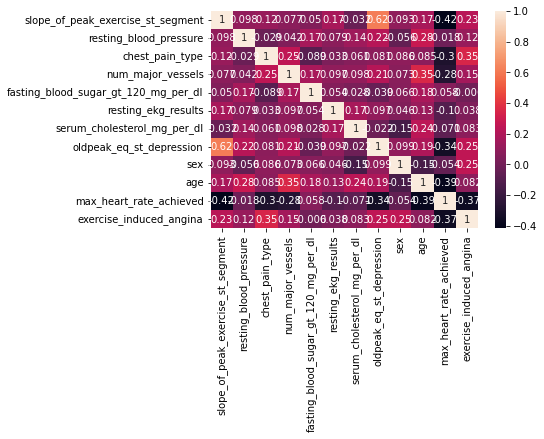

<Figure size 1440x720 with 0 Axes>

In [17]:
# correlation plot for features
sns.heatmap(df_values.corr(), annot=True)
plt.figure(figsize=(20,10))

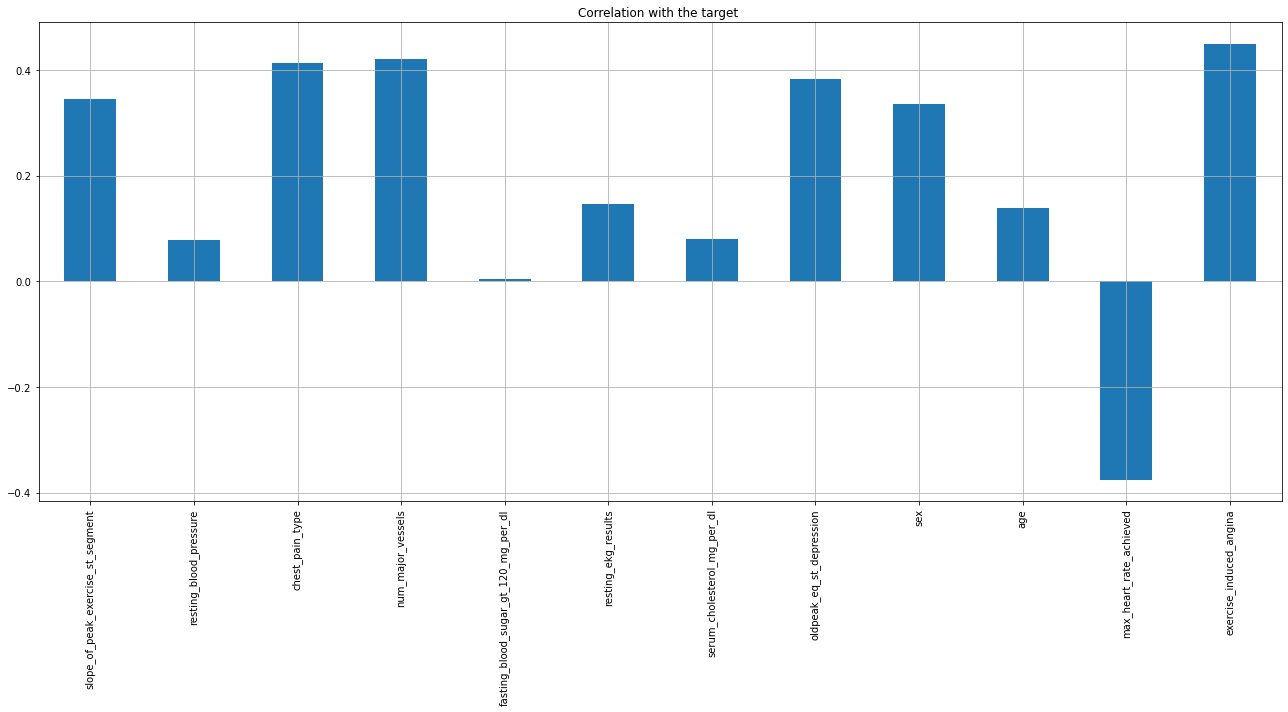

In [18]:
# checking correlation with the target
sns.set_context(font_scale = 2)
df.drop('heart_disease_present', axis=1).corrwith(df.heart_disease_present).plot(kind='bar', grid=True, figsize=(18, 10), 
                                                        title="Correlation with the target ")
plt.tight_layout()

* All features are positevely correlated with the target variable except max_heart_rate_achieved

In [19]:
# checking the distribution of target variable
df['heart_disease_present'].value_counts()

0    100
1     80
Name: heart_disease_present, dtype: int64

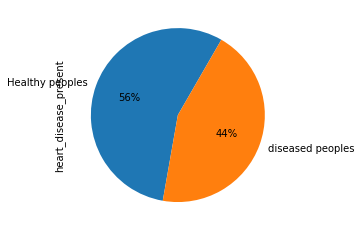

In [20]:
# showing persentage of heart disease patients in dataset
df['heart_disease_present'].value_counts().plot.pie( x="Heart disease" ,y ='no.of patients', 
                   autopct = "%1.0f%%",labels=["Healthy peoples","diseased peoples"], startangle = 60);

<AxesSubplot:xlabel='heart_disease_present', ylabel='count'>

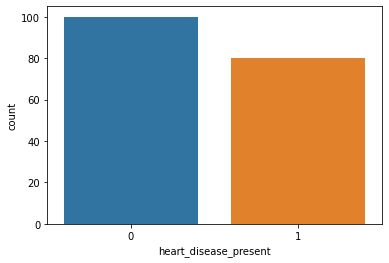

In [21]:
sns.countplot(x='heart_disease_present',data=df)

* There are more healthy patients than diseased
* The data is relatevely well balanced

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


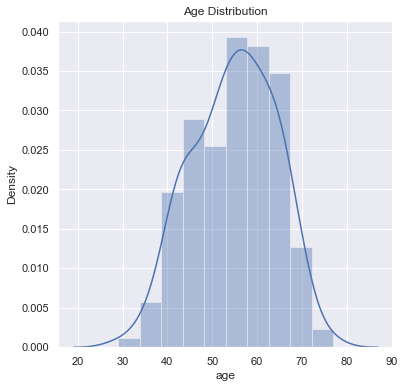

In [22]:
# checking the distribution of age variable
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(df['age'])
plt.title('Age Distribution')
plt.show()

* Average age of patients is around 55

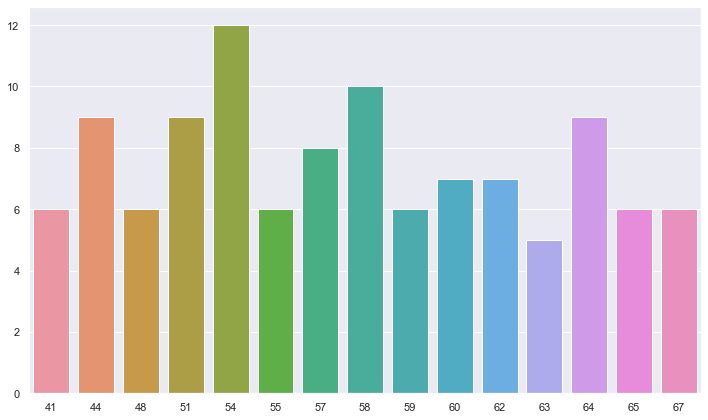

In [23]:
plt.figure(figsize=(10,6))
sns.set_context('notebook',font_scale = 1)
sns.barplot(x=df.age.value_counts()[:15].index,y=df.age.value_counts()[:15].values)
plt.tight_layout()

* 54 age column has highest frequency

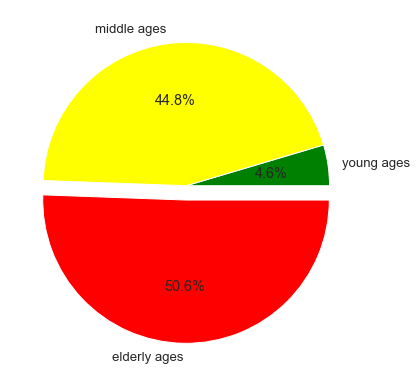

In [24]:
Young = df[(df.age>=29)&(df.age<40)]
Middle = df[(df.age>=40)&(df.age<55)]
Elder = df[(df.age>55)]
colors = ['green','yellow','red']
explode = [0,0,0.1]
plt.figure(figsize=(6,6))
sns.set_context('notebook',font_scale = 1.2)
plt.pie([len(Young),len(Middle),len(Elder)],labels=['young ages','middle ages','elderly ages'],explode=explode,colors=colors, autopct='%1.1f%%')
plt.tight_layout()

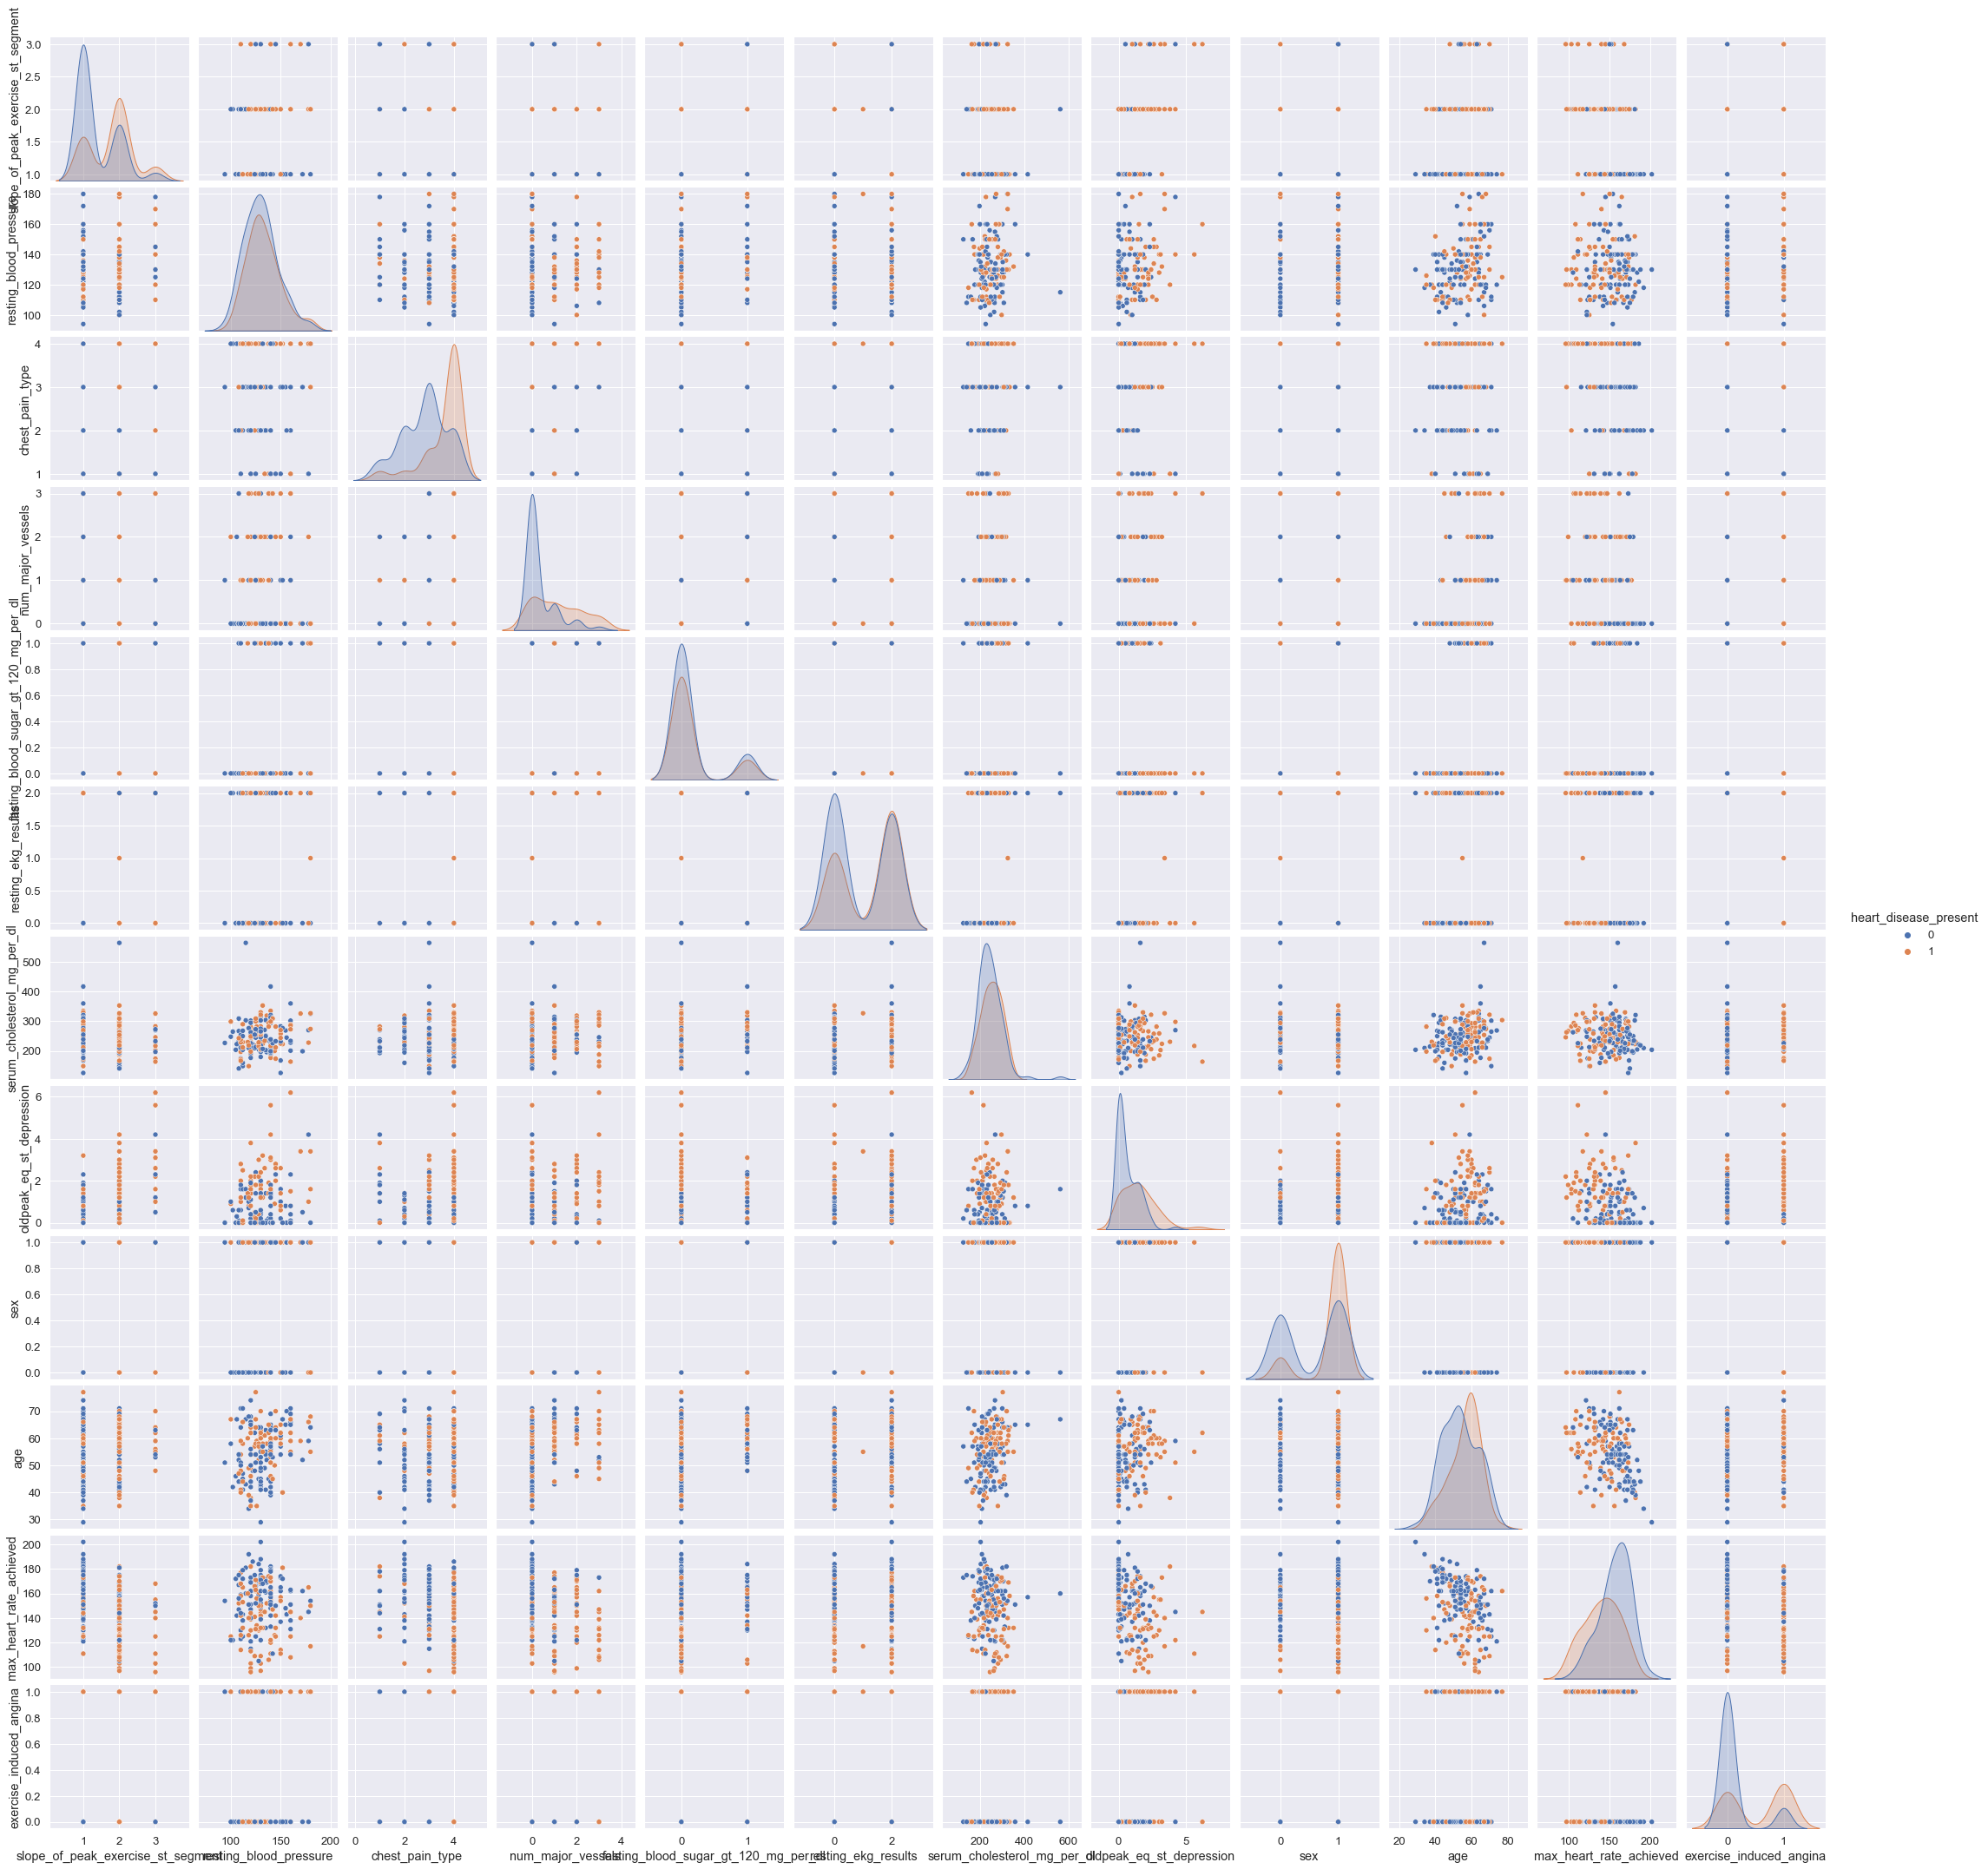

In [25]:
sns.pairplot(df_values.join(df['heart_disease_present']), 
             hue='heart_disease_present'
            )

<AxesSubplot:xlabel='sex', ylabel='count'>

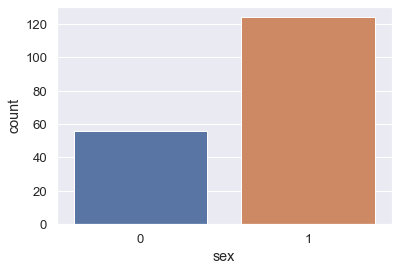

In [26]:
sns.countplot(x='sex',data=df)

* Ratio of male to female is approximately 2:1

<AxesSubplot:xlabel='sex', ylabel='count'>

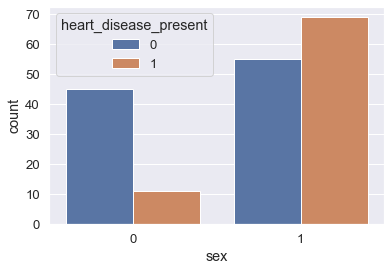

In [27]:
sns.countplot(x='sex',data=df,hue='heart_disease_present')

* Males are more susceptible to get heart disease than females

<AxesSubplot:xlabel='sex', ylabel='count'>

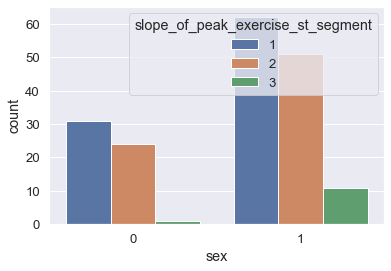

In [28]:
sns.countplot(x='sex',data=df,hue='slope_of_peak_exercise_st_segment')

* Slope value is higher in case of male

<AxesSubplot:xlabel='chest_pain_type', ylabel='count'>

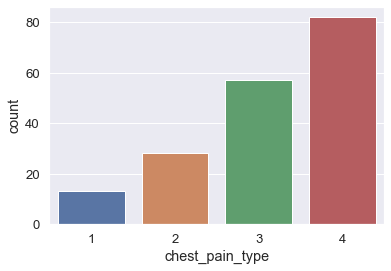

In [29]:
sns.countplot(x='chest_pain_type',data=df)

<AxesSubplot:xlabel='chest_pain_type', ylabel='count'>

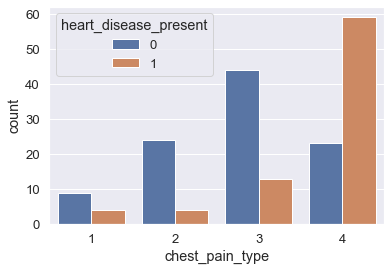

In [30]:
# analysing chest pain type according to target variable
sns.countplot(x='chest_pain_type',data=df,hue='heart_disease_present')

* most of the heart disease patients are found to have chest pain type 4
* People having the least chest pain are not likely to have heart disease.
* People having severe chest pain are likely to have heart disease.

<AxesSubplot:xlabel='fasting_blood_sugar_gt_120_mg_per_dl', ylabel='count'>

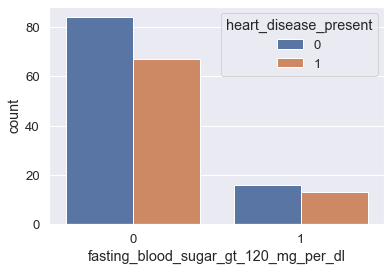

In [31]:
sns.countplot(x='fasting_blood_sugar_gt_120_mg_per_dl',data=df_values,hue=df_labels['heart_disease_present'])

*  there are higher number of heart disease patients without diabetes.so it might not be a strong feature differentiating the target

<AxesSubplot:xlabel='sex', ylabel='count'>

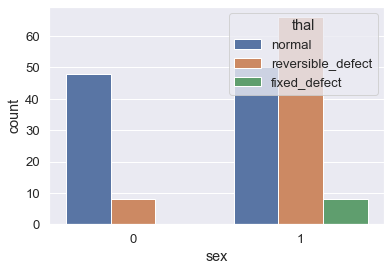

In [32]:
sns.countplot(x='sex',data=df_values,hue='thal')

* males are more sensitive to thallium stress test

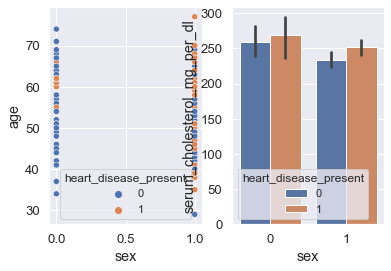

In [33]:
fig,axes=plt.subplots(1,2)
sns.set(rc={'figure.figsize':(8,6)});np.random.seed(0)
sns.scatterplot(x='sex',y='age',data=df_values,hue=df_labels['heart_disease_present'],ax=axes[0])
sns.barplot(x='sex',y='serum_cholesterol_mg_per_dl',data=df_values,hue=df_labels['heart_disease_present'],ax=axes[1])
plt.show()

*  Most of the females are in the range of fifty five  to sixty six were having heart disease.In case of males it ranges from extreme low to very high
* Cholestrol level is high in case of both males and females having heart disease

In [34]:
# encoding using label encoder
le = LabelEncoder()
df.thal = le.fit_transform(df.thal)

In [35]:
df.head()

,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present
0,1,1,128,2,0,0,2,308,0.0,1,45,170,0,0
1,2,1,110,3,0,0,0,214,1.6,0,54,158,0,0
2,1,1,125,4,3,0,2,304,0.0,1,77,162,1,1
3,1,2,152,4,0,0,0,223,0.0,1,40,181,0,1
4,3,2,178,1,0,0,2,270,4.2,1,59,145,0,0


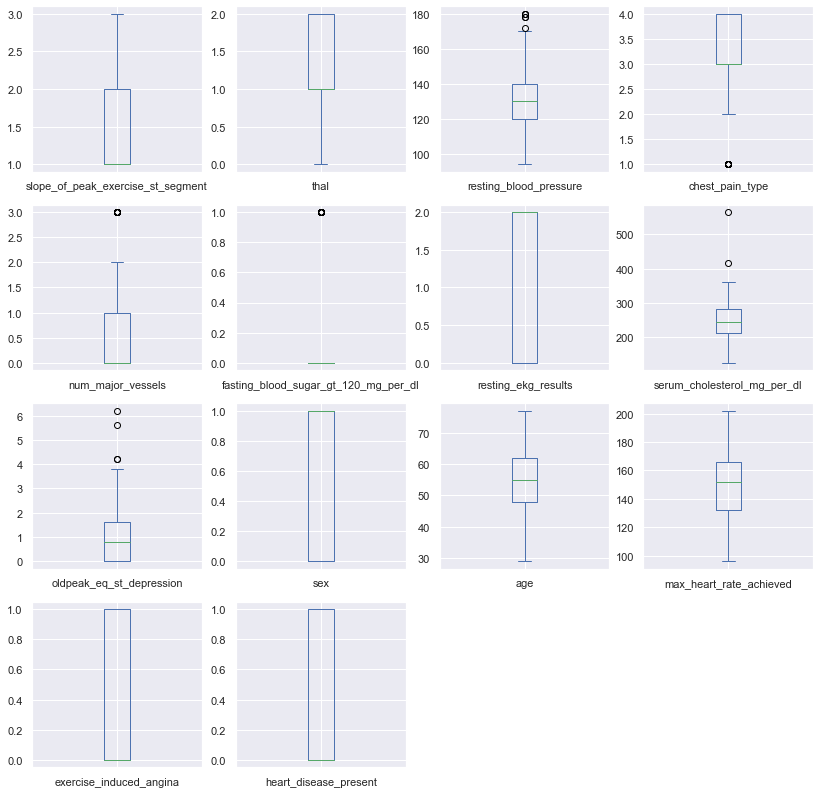

In [36]:
# checking for outliers
df.plot(kind='box',figsize=(14,14),layout=(4,4),sharex=False,subplots=True);

In [37]:
# Removing outliers
Q1 = np.percentile(df.resting_blood_pressure, 25)
Q1 = np.percentile(df.chest_pain_type, 25)
Q1 = np.percentile(df.num_major_vessels, 25)
Q1 = np.percentile(df.fasting_blood_sugar_gt_120_mg_per_dl, 25)
Q1 = np.percentile(df.serum_cholesterol_mg_per_dl, 25)
Q1 = np.percentile(df.oldpeak_eq_st_depression, 25)
Q1

0.0

In [38]:
Q3 = np.percentile(df.resting_blood_pressure, 75)
Q3 = np.percentile(df.chest_pain_type, 75)
Q3 = np.percentile(df.num_major_vessels, 75)
Q3 = np.percentile(df.fasting_blood_sugar_gt_120_mg_per_dl, 75)
Q3 = np.percentile(df.serum_cholesterol_mg_per_dl, 75)
Q3 = np.percentile(df.oldpeak_eq_st_depression, 75)
Q3

1.6

In [39]:
IQR = Q3 - Q1
IQR

1.6

In [40]:
lower_limit= Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

In [41]:
df [ (df.resting_blood_pressure < lower_limit) | (df.resting_blood_pressure > upper_limit) ]
df [ (df. chest_pain_type< lower_limit) | (df.chest_pain_type> upper_limit) ]
df [ (df.num_major_vessels< lower_limit) | (df.num_major_vessels > upper_limit) ]
df [ (df.fasting_blood_sugar_gt_120_mg_per_dl < lower_limit) | (df.fasting_blood_sugar_gt_120_mg_per_dl > upper_limit) ]
df [ (df.serum_cholesterol_mg_per_dl < lower_limit) | (df.serum_cholesterol_mg_per_dl > upper_limit) ]
df [ (df.oldpeak_eq_st_depression< lower_limit) | (df.oldpeak_eq_st_depression > upper_limit) ]

,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present
4,3,2,178,1,0,0,2,270,4.2,1,59,145,0,0
112,2,2,140,4,3,0,0,298,4.2,1,51,122,1,1
140,3,2,140,4,0,0,0,217,5.6,1,55,111,1,1
162,3,2,160,4,3,0,2,164,6.2,0,62,145,0,1


In [42]:
df_temp = df [ (df.resting_blood_pressure >= lower_limit) & (df.resting_blood_pressure <= upper_limit) ]
df_temp = df [ (df.chest_pain_type >= lower_limit) & (df.chest_pain_type <= upper_limit) ]
df_temp = df [ (df.num_major_vessels >= lower_limit) & (df.num_major_vessels <= upper_limit) ]
df_temp = df [ (df.fasting_blood_sugar_gt_120_mg_per_dl >= lower_limit) & (df.fasting_blood_sugar_gt_120_mg_per_dl <= upper_limit) ]
df_temp = df [ (df.serum_cholesterol_mg_per_dl >= lower_limit) & (df.serum_cholesterol_mg_per_dl <= upper_limit) ]
df_temp = df [ (df.oldpeak_eq_st_depression >= lower_limit) & (df.oldpeak_eq_st_depression<= upper_limit) ]

In [43]:
df_temp

,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present
0,1,1,128,2,0,0,2,308,0.0,1,45,170,0,0
1,2,1,110,3,0,0,0,214,1.6,0,54,158,0,0
2,1,1,125,4,3,0,2,304,0.0,1,77,162,1,1
3,1,2,152,4,0,0,0,223,0.0,1,40,181,0,1
5,1,1,130,3,0,0,0,180,0.0,1,42,150,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,2,2,125,4,2,1,0,254,0.2,1,67,163,0,1
176,2,1,180,4,0,0,1,327,3.4,0,55,117,1,1
177,2,2,125,3,0,0,0,309,1.8,1,64,131,1,1
178,1,1,124,3,2,1,0,255,0.0,1,48,175,0,0


In [44]:
# Feature scaling using standard scaler
ss = StandardScaler()

df_temp.ss = pd.DataFrame(ss.fit_transform(df_temp), columns=df_temp.columns)

C:\Users\HP\AppData\Local\Temp\ipykernel_6444\3971667308.py:4: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df_temp.ss = pd.DataFrame(ss.fit_transform(df_temp), columns=df_temp.columns)


In [45]:
df_temp.ss.head()

,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present
0,-0.881362,-0.623628,-0.167555,-1.245821,-0.716933,-0.444161,0.952825,1.113177,-0.977644,0.67420,-1.040316,0.915134,-0.67420,-0.881917
1,0.804722,-0.623628,-1.250852,-0.165700,-0.716933,-0.444161,-1.055524,-0.674997,0.725973,-1.48324,-0.081700,0.368538,-0.67420,-0.881917
2,-0.881362,-0.623628,-0.348105,0.914420,2.464079,-0.444161,0.952825,1.037085,-0.977644,0.67420,2.368096,0.550737,1.48324,1.133893
3,-0.881362,1.146670,1.276840,0.914420,-0.716933,-0.444161,-1.055524,-0.503789,-0.977644,0.67420,-1.572881,1.416181,-0.67420,1.133893
4,-0.881362,-0.623628,-0.047189,-0.165700,-0.716933,-0.444161,-1.055524,-1.321783,-0.977644,0.67420,-1.359855,0.004141,-0.67420,-0.881917


In [46]:
# splitting the dependent and independent variable
X = df_temp.drop(columns='heart_disease_present', axis=1)
y = df_temp['heart_disease_present']

In [47]:
# Split the data into train data and test data
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=25)

### Logistic Regression

In [48]:
model = LogisticRegression(max_iter=3000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=3000)

In [49]:
y_predict = model.predict(X_test)

In [50]:
accuracy_score(y_test, y_predict)

0.9444444444444444

In [51]:
confusion_matrix(y_test, y_predict)

array([[19,  2],
       [ 0, 15]], dtype=int64)

In [52]:
pd.crosstab(y_test, y_predict)

col_0,0,1
heart_disease_present,,
0,19,2
1,0,15


In [53]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       1.00      0.90      0.95        21
           1       0.88      1.00      0.94        15

    accuracy                           0.94        36
   macro avg       0.94      0.95      0.94        36
weighted avg       0.95      0.94      0.94        36



### KNN

In [68]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=15)
model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=15)

In [69]:
y_predict = model.predict(X_test)

In [70]:
accuracy_score(y_test, y_predict)

0.5555555555555556

In [63]:
knn_scores=[]
for k in range(1,21):
    knn_classifier=KNeighborsClassifier(n_neighbors=k)
    score=cross_val_score(knn_classifier,X,y,cv=10)
    knn_scores.append(score.mean())

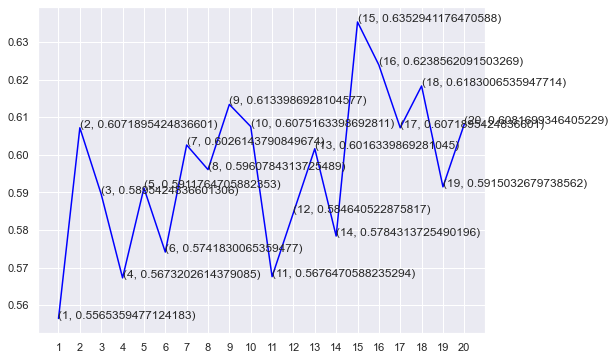

In [64]:
plt.plot([k for k in range(1,21)],knn_scores,color='blue')
for i in range(1,21):
    plt.text(i,knn_scores[i-1],(i,knn_scores[i-1]))
    plt.xticks([i for i in range(1,21)])

In [71]:
confusion_matrix(y_test, y_predict)

array([[12,  9],
       [ 7,  8]], dtype=int64)

In [72]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.63      0.57      0.60        21
           1       0.47      0.53      0.50        15

    accuracy                           0.56        36
   macro avg       0.55      0.55      0.55        36
weighted avg       0.56      0.56      0.56        36



### Random Forest

In [73]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

In [74]:
y_predict = model.predict(X_test)

In [75]:
accuracy_score(y_test, y_predict)

0.9166666666666666

In [76]:
pd.crosstab(y_test, y_predict)

col_0,0,1
heart_disease_present,,
0,18,3
1,0,15


In [77]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       1.00      0.86      0.92        21
           1       0.83      1.00      0.91        15

    accuracy                           0.92        36
   macro avg       0.92      0.93      0.92        36
weighted avg       0.93      0.92      0.92        36

